# **Hacktiv8 Introduction to Python for Data Science - Project Assignment 3 - Bank Marketing Data Set**

Nama : Andrena Dhiffa Salsabila

Kode Peserta : PYTN-KS20-02

Kelas : PYTN-KS-20

## **Project Overview**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
- bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
- bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

- bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
- related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
- social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
- Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')

<p> 
    Link Dataset : <a href=https://archive.ics.uci.edu/dataset/222/bank+marketing>Bank Marketing Data Set</a>

## **Libraries**

In [322]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from joblib import dump

import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

## **Import Data**

Import dataset ke variabel df yang dibagi menjadi data train dan data testing.

In [323]:
# Data Training
df =  pd.read_csv('bank-additional-full.csv', delimiter=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [324]:
# Mengetahui info dari data training
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [325]:
# Mengetahui jumlah baris dan kolom dari data train
df.shape

(41188, 21)

In [326]:
# Data Testing
df_testing = pd.read_csv('bank-additional.csv', delimiter=';')
df_testing.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [327]:
# Mengetahui info data testing
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [328]:
# Mengetahui jumlah baris dan kolom dari data testing
df_testing.shape

(4119, 21)

## **Data Cleaning**

Memeriksa apakah terdapat data yang memiliki missing value atau duplikat pada dataset

In [329]:
df.replace(' ',np.nan,inplace=True)
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [330]:
# Mengetahui jumlah duplikat pada data training
df.duplicated().sum()

12

Karena pada data training terdapat 12 duplikat maka perlu dihapus.

In [331]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [332]:
df_testing.replace(' ' ,np.nan, inplace=True)
df_testing.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [333]:
# Mengetahui jumlah duplikat pada data testing
df_testing.duplicated().sum()

0

Setelah dilakukan pemeriksaan terhadap missing value serta duplikat, lalu kelompokkan berdasarkan tipe data.

In [334]:
numerical = ['age', 'duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
boolean = ['y']

## **Visualization**

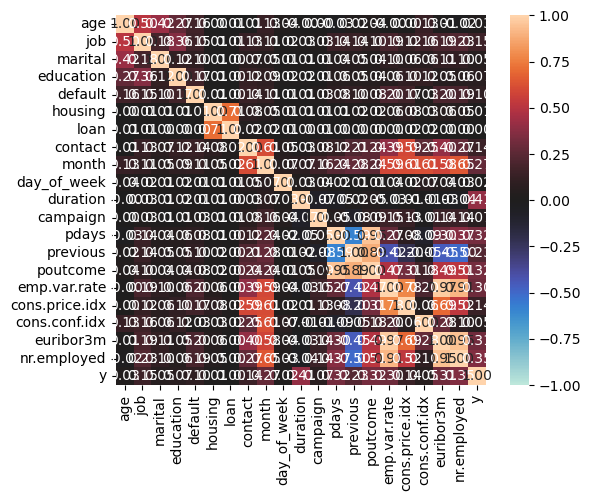

In [335]:
correlation = associations(df)

**Insight** : Berdasarkan output diatas, dapat dilihat bahwa antar variabel saling berkorelasi.

Menentukan tingkat keputusan akhir klien dalam berlangganan _term deposit_

In [336]:
df_decision = df['y'].value_counts(normalize=True)*100

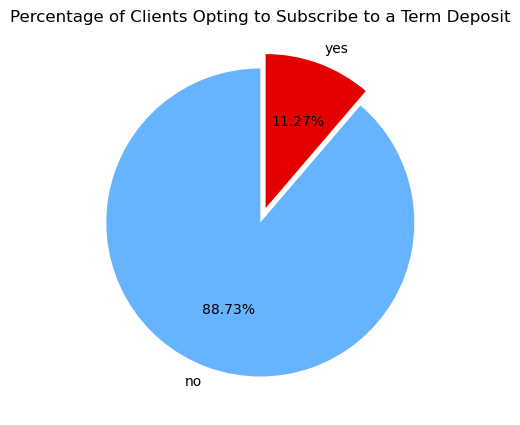

In [337]:
plt.figure(figsize=(5, 5))
plt.title('Percentage of Clients Opting to Subscribe to a Term Deposit')
labels = df['y'].unique()
plt.pie(df_decision, labels=labels, startangle=90, autopct='%1.2f%%', explode=(0, 0.1), colors=['#66b3ff', '#E50000'])
plt.show()

**Kesimpulan** : Berdasarkan output diatas, terdapat 11.27% klien yang memutuskan untuk bergabung menjadi nasabah bank, sedangkan 88.73% lainnya tidak bergabung menjadi nasabah bank. Karena hasil yang tidak signifikan maka dapat disimpulkan teknik marketing via telepon tidak efektif untuk digunakan.

## **Data Preprocessing**

Karena pada dataset masih terdapat data categorial dan boolean maka semua diubah menjadi data numerical.

In [338]:
le = LabelEncoder()

# Mengubah data categorical menjadi numerical
for col in categorical:
    df[col] = le.fit_transform(df[col])
    df_testing[col] = le.transform(df_testing[col])

# Mengubah data boolean menjadi numerical
for col in boolean:
    df[col] = le.fit_transform(df[col])
    df_testing[col] = le.transform(df_testing[col])

Menentukan x_train, y_train, x_test, dan y_test

In [339]:
# Menentukan x_train
x_array = df[features].to_numpy()
x_train = x_array

# Menetukan y_train
y_array = df['y'].astype('int').to_numpy()
y_train = y_array

In [340]:
# Menentukan x_test 
x_array2 = df_testing[features].to_numpy()
x_test = x_array2

# Menentukan y_test
y_array2 = df_testing['y'].astype('int').to_numpy()
y_test = y_array2

## **Logistic Regression**

Membuat model Logistic Regression

In [341]:
reglog_model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=1)
reglog_model.fit(x_train,y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=1,
                   solver='liblinear')

Membuat prediksi dari model Logistic Regression

In [342]:
reglog_pred = reglog_model.predict(x_test)

Menampilkan hasil prediksi dari model Logistic Regression

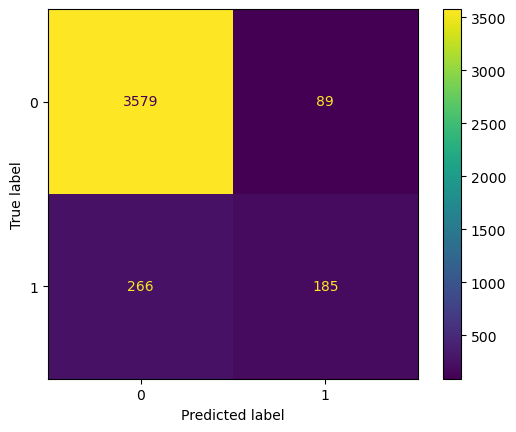

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3668
           1       0.68      0.41      0.51       451

    accuracy                           0.91      4119
   macro avg       0.80      0.69      0.73      4119
weighted avg       0.90      0.91      0.90      4119

Accuracy = 91.38%


In [343]:
cm = confusion_matrix(y_test, reglog_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='viridis', values_format='d', ax=plt.gca())
plt.grid(False)
plt.show()

print(classification_report(y_test, reglog_pred))
accuracy = accuracy_score(y_test, reglog_pred)
print(f"Accuracy = {accuracy * 100:.2f}%")

**Kesimpulan** : Berdasarkan output diatas, didapati hasil akurasi model pada regresi logistik yang cukup baik yaitu 91.38%

## **K-Nearest Neighbors**

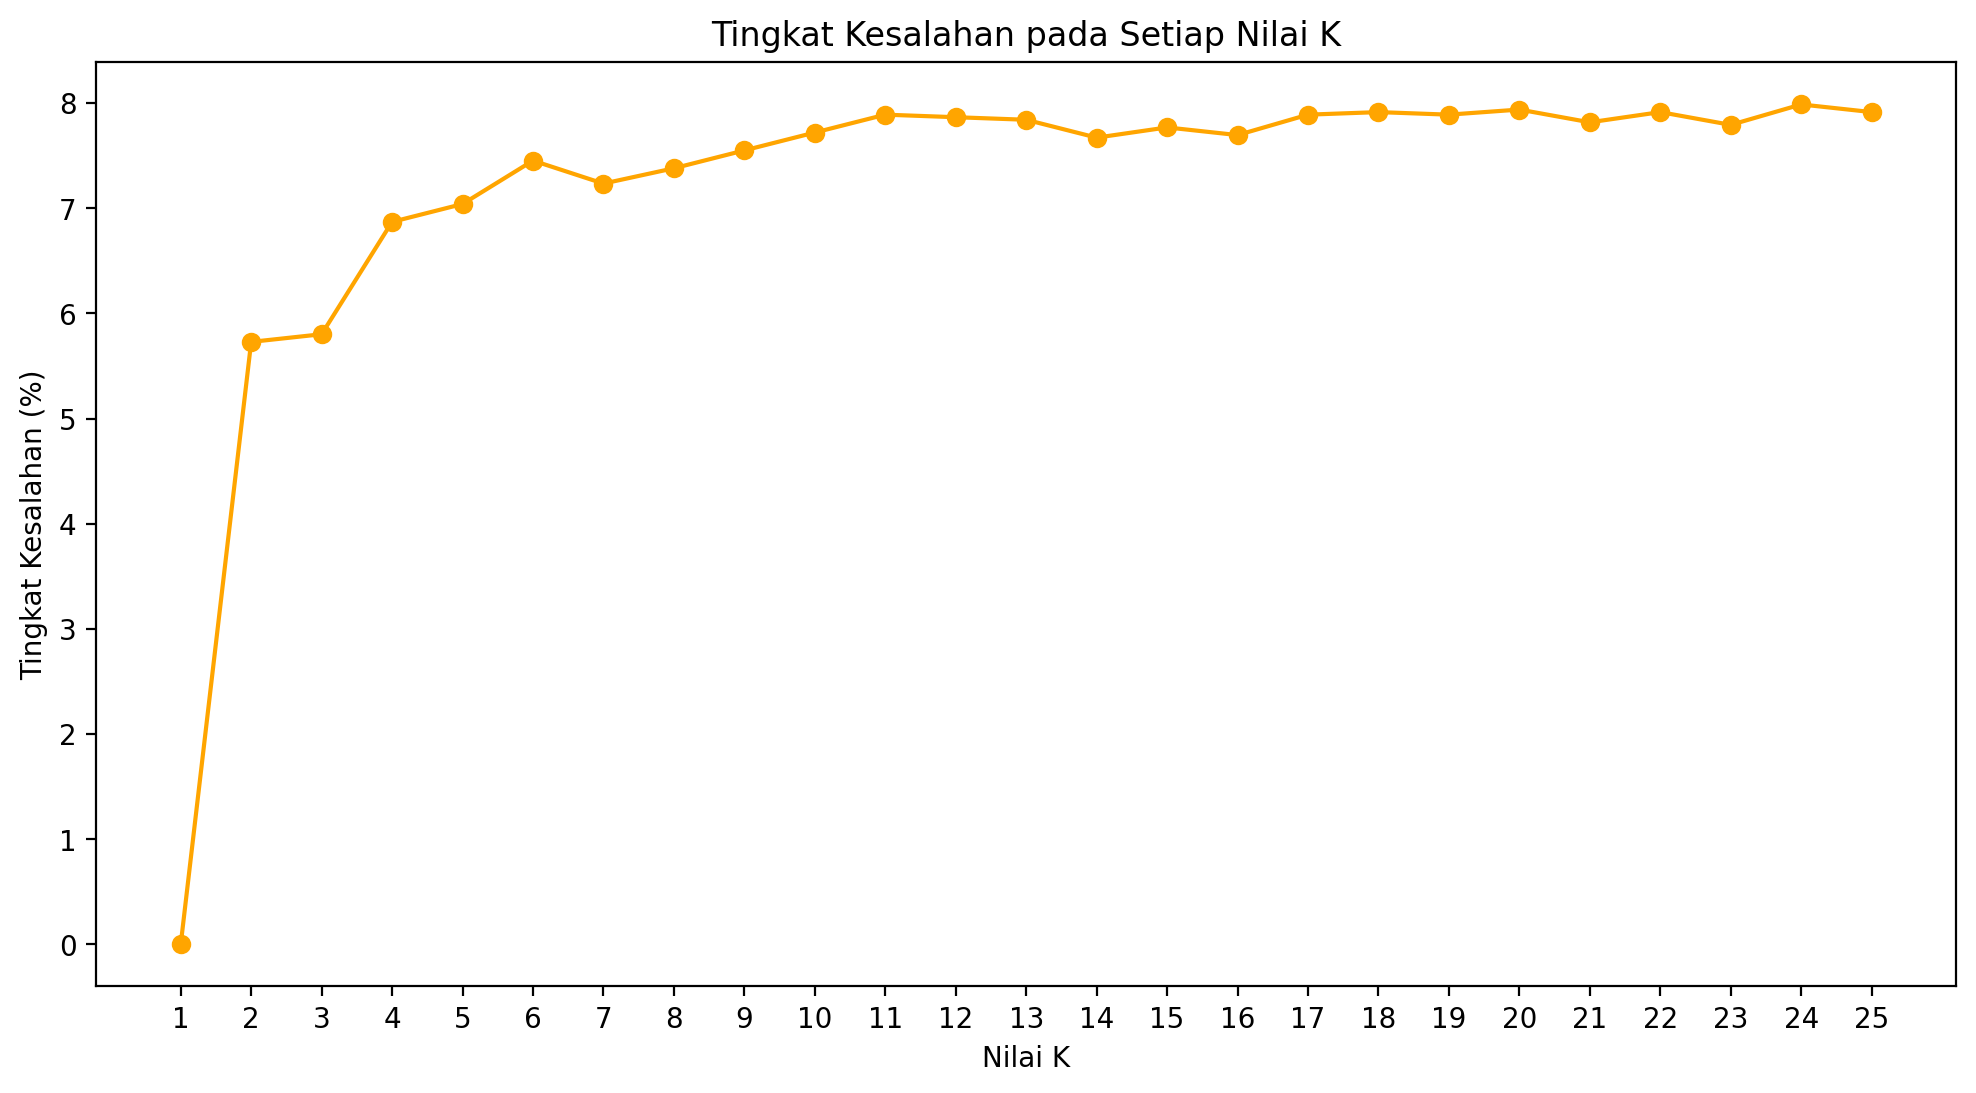

In [344]:
errors = []
for i in range(1,26):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    knn_pred = knn_model.predict(x_test)
    error = 100 - (accuracy_score(y_test,knn_pred)*100)
    errors.append(error)

plt.figure(figsize=(12,6),dpi=200)
plt.plot(range(1,26),errors,color="orange",marker="o")
plt.title("Tingkat Kesalahan pada Setiap Nilai K")
plt.xlabel("Nilai K")
plt.xticks(range(1,26))
plt.ylabel("Tingkat Kesalahan (%)")
plt.show()

Berdasarkan output diatas, diputuskan nilai K adalah 5 karena tidak terdapat peningkatan yang signifikan terhadap tingkat kesalahan dari 6 sampai 25.

Membuat dan melatih model K-Nearest Neighbors dengan k=5

In [345]:
knn_model2 = KNeighborsClassifier(n_neighbors=5)
knn_model2.fit(x_train,y_train)

KNeighborsClassifier()

Membuat prediksi dari model K-Nearest Neighbors

In [346]:
knn_model2_pred = knn_model2.predict(x_test)

Menampilkan hasil prediksi dari model K-Nearest Neighbors

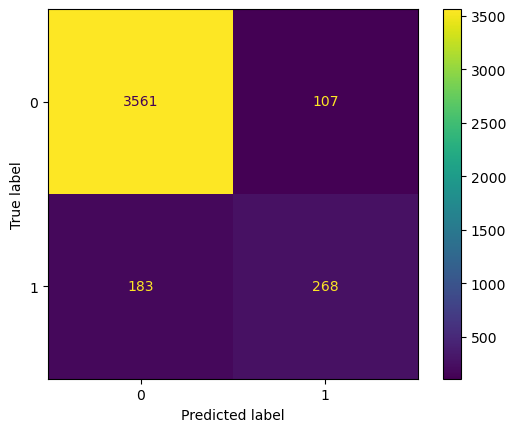

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3668
           1       0.71      0.59      0.65       451

    accuracy                           0.93      4119
   macro avg       0.83      0.78      0.80      4119
weighted avg       0.93      0.93      0.93      4119

Accuracy = 92.96%


In [347]:
cm = confusion_matrix(y_test, knn_model2_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='viridis', values_format='d', ax=plt.gca())
plt.grid(False)
plt.show()

print(classification_report(y_test, knn_model2_pred))
accuracy = accuracy_score(y_test, knn_model2_pred)
print(f"Accuracy = {accuracy * 100:.2f}%")

**Kesimpulan** : Berdasarkan output diatas, didapati hasil akurasi model pada K-Nearest Neighbour cukup baik yaitu 92.96%

## **Support Vector Machine**

Membuat model dari Support Vector Machine

In [348]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

Membuat prediksi menggunakan Support Vector Machine

In [349]:
svm_pred = svm_model.predict(x_test)

Menampilkan hasil prediksi dari model Support Vector Machine

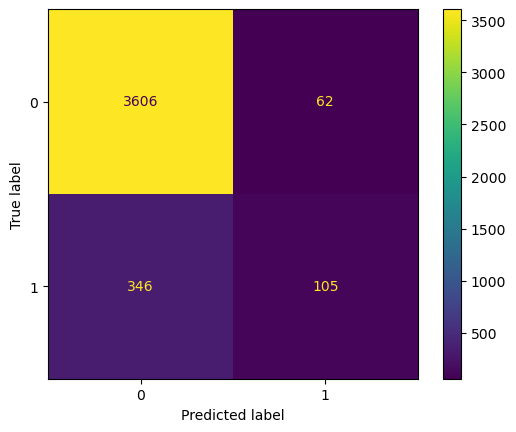

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3668
           1       0.63      0.23      0.34       451

    accuracy                           0.90      4119
   macro avg       0.77      0.61      0.64      4119
weighted avg       0.88      0.90      0.88      4119

Accuracy = 90.09%


In [350]:
cm = confusion_matrix(y_test, svm_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='viridis', values_format='d', ax=plt.gca())
plt.grid(False)
plt.show()

print(classification_report(y_test, svm_pred))
accuracy = accuracy_score(y_test, svm_pred)
print(f"Accuracy = {accuracy * 100:.2f}%")

**Kesimpulan** : Berdasarkan output diatas, didapati hasil akurasi model pada Support Vector Machine cukup baik yaitu 90.09%

## **Decision Tree**

Mencari _best parameters_ menggunakan grid search

In [351]:
max_depths = list(range(1, 20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

dt_classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 1}


Membuat model menggunakan Decision Tree

In [352]:
dt_model = DecisionTreeClassifier(max_depth=1,criterion='gini')
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

Membuat prediksi menggunakan Decision Tree

In [353]:
dt_pred = dt_model.predict(x_test)

Menampilkan hasil prediksi dari model Decision Tree

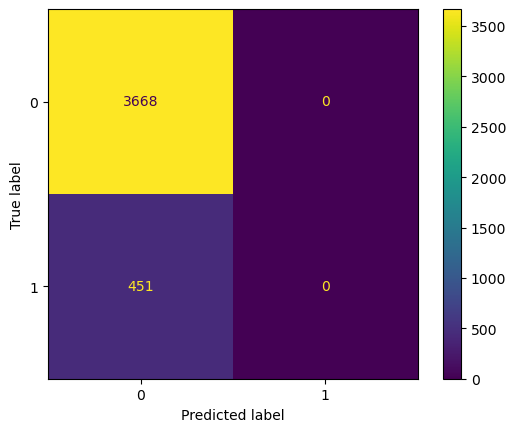

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3668
           1       0.00      0.00      0.00       451

    accuracy                           0.89      4119
   macro avg       0.45      0.50      0.47      4119
weighted avg       0.79      0.89      0.84      4119

Accuracy = 89.05%


c:\Users\Lenovo\Latihan pertemuan 1\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\Latihan pertemuan 1\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\Latihan pertemuan 1\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [354]:
cm = confusion_matrix(y_test, dt_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='viridis', values_format='d', ax=plt.gca())
plt.grid(False)
plt.show()

print(classification_report(y_test, dt_pred))
accuracy = accuracy_score(y_test, dt_pred)
print(f"Accuracy = {accuracy * 100:.2f}%")

**Kesimpulan** : Berdasarkan output diatas, didapati hasil akurasi model pada Decision Tree cukup baik yaitu 89.05%

## **Random Forest**

Menghitung dan memvisualisasikan tingkat kesalahan untuk 25 jumlah trees

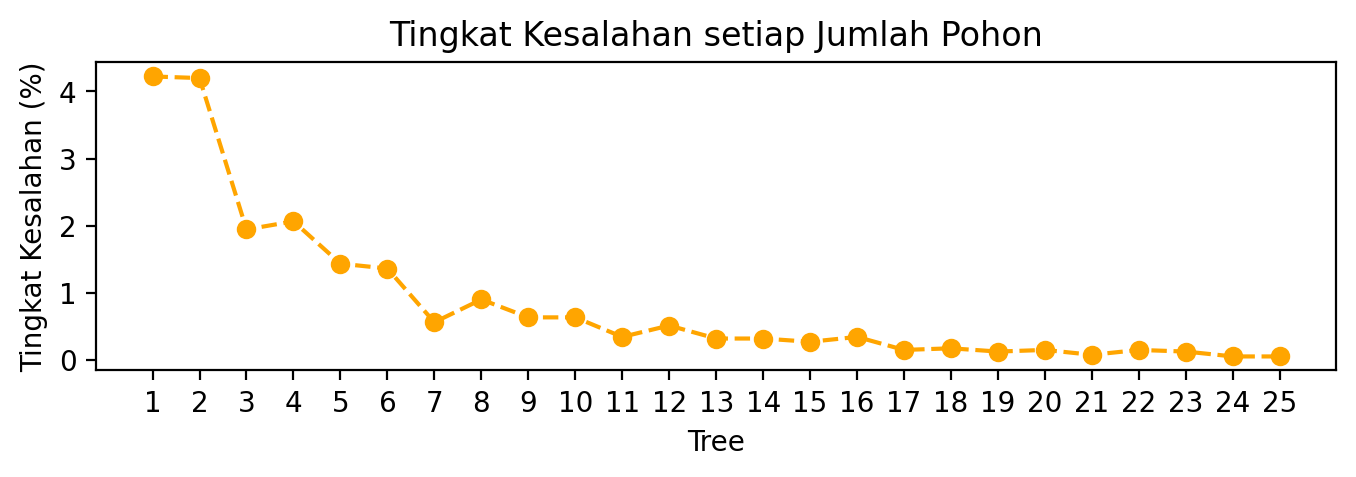

In [355]:
errors = []
for _ in range(1,26):
    rf_model = RandomForestClassifier(n_estimators=_)
    rf_model.fit(x_train,y_train)
    rf_pred = rf_model.predict(x_test)
    error = 100 - (accuracy_score(y_test,rf_pred)*100)
    errors.append(error)

plt.figure(figsize=(8,2),dpi=200)
plt.plot(range(1,26),errors,color="orange",marker="o",ls="--")
plt.title("Tingkat Kesalahan setiap Jumlah Pohon")
plt.xlabel("Tree")
plt.xticks(range(1,26))
plt.ylabel("Tingkat Kesalahan (%)")
plt.show()

Membuat dan melatih model random forest dengan 6 trees

In [356]:
rf_model2 = RandomForestClassifier(n_estimators=6)
rf_model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=6)

Menggunakan uji Random Forest untuk memprediksi data testing

In [357]:
rf_pred = rf_model.predict(x_test)

Menampilkan hasil prediksi dari model Random Forest

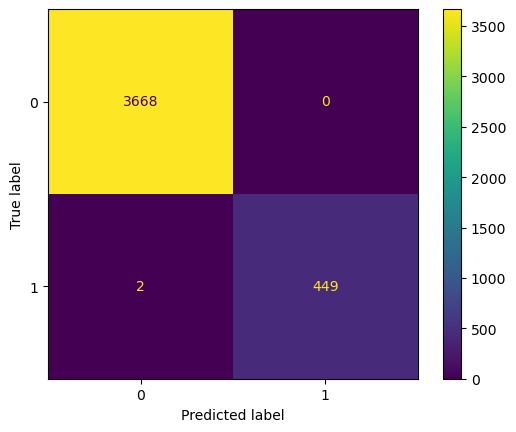

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3668
           1       1.00      1.00      1.00       451

    accuracy                           1.00      4119
   macro avg       1.00      1.00      1.00      4119
weighted avg       1.00      1.00      1.00      4119

Accuracy = 100.0%


In [358]:
cm = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='viridis', values_format='d', ax=plt.gca())
plt.grid(False)
plt.show()

print(classification_report(y_test, rf_pred))
accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy = {accuracy * 100:.1f}%")

**Kesimpulan** : Berdasarkan output diatas, didapati hasil akurasi model pada Random Forest Classifier cukup baik yaitu 100%

## **Naive Bayes**

Membuat dan gunakan Naive Bayes Model dengan Uji Gaussian

In [359]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

Prediksi nilai menggunakan Naive Bayes Model

In [360]:
nb_pred = nb_model.predict(x_test)

Menampilkan hasil prediksi dari model Naive Bayes

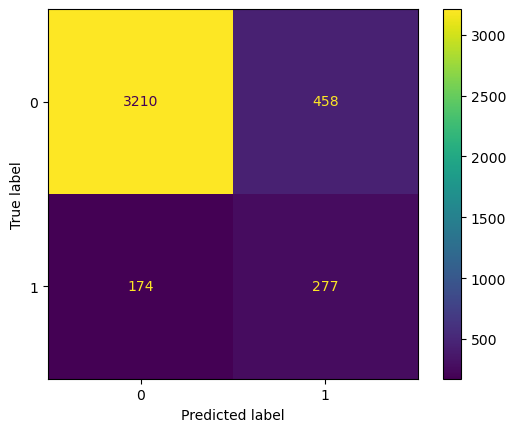

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3668
           1       0.38      0.61      0.47       451

    accuracy                           0.85      4119
   macro avg       0.66      0.74      0.69      4119
weighted avg       0.89      0.85      0.86      4119

Accuracy = 84.7%


In [361]:
cm = confusion_matrix(y_test, nb_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='viridis', values_format='d', ax=plt.gca())
plt.grid(False)
plt.show()

print(classification_report(y_test, nb_pred))
accuracy = accuracy_score(y_test, nb_pred)
print(f"Accuracy = {accuracy * 100:.1f}%")

**Kesimpulan** : Berdasarkan output diatas, didapati hasil akurasi model pada Naive Bayes cukup baik yaitu 84.7%

## **Conclusion**

Dapat diambil kesimpulan:
1. Terdapat 11.27% klien yang memutuskan untuk bergabung menjadi nasabah bank, sedangkan 88.73% lainnya tidak bergabung menjadi nasabah bank. Karena hasil yang tidak signifikan maka dapat disimpulkan teknik marketing via telepon tidak efektif untuk digunakan. 
2. Berdasarkan pemodelan yang sudah dilakukan, semua memiliki nilai akurasi yang cukup baik (Logistic Regression = 91.38%, K-Nearest Neighbour = 92.96%, Support Vector Machine = 90.09%, Decision Tree = 89.5%, Random Forest = 100%, Naive Bayes = 84,7%) serta diketahui bahwa model K-Nearest Neighbors dan model Random Forest memiliki skor akurasi yang lebih tinggi daripada model lainnya. Namun, prediksi dari kedua model tersebut tidak akurat dan tidak seimbang, sehingga tidak disarankan untuk digunakan. 

In [362]:
x = ["Naive Bayes","Decision Tree","Support Vector Machine","Logistic Regression"]
y = [np.round(accuracy_score(y_test,nb_pred)*100,3),np.round(accuracy_score(y_test,dt_pred)*100,3),
     np.round(accuracy_score(y_test,svm_pred)*100,3),np.round(accuracy_score(y_test,reglog_pred)*100,3)]


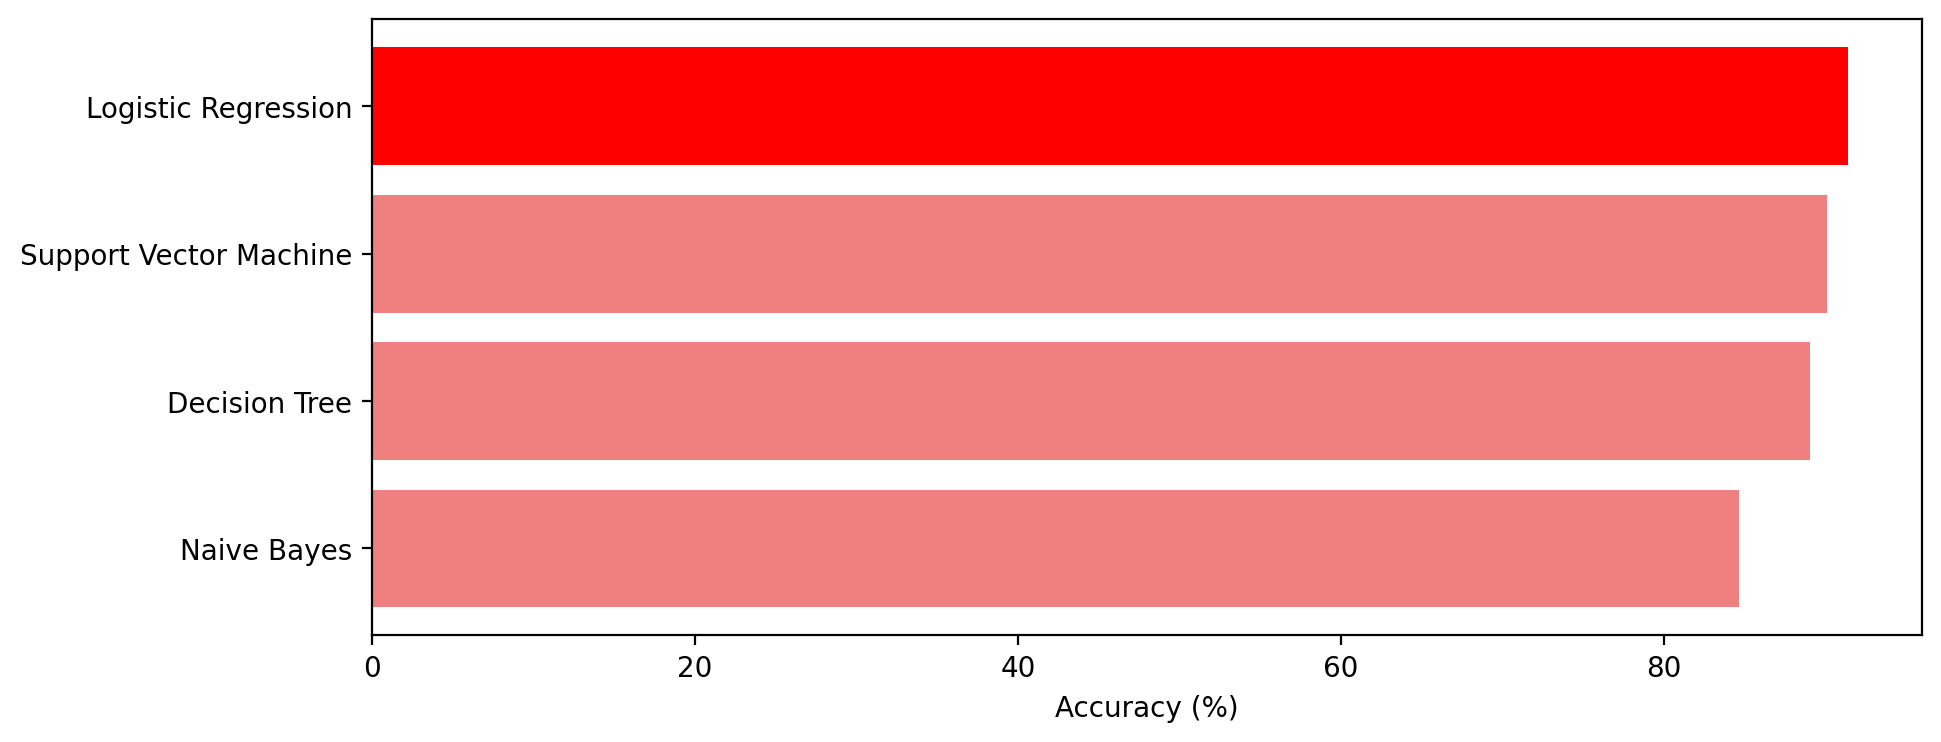

In [363]:
color = []
for _ in np.array(y):
    if _ == np.max(np.array(y)):
         color.append("red")
    else:
        color.append("lightcoral")
        
plt.figure(figsize=(10,4),dpi=200)
plt.barh(x,y,color=color)
plt.xlabel("Accuracy (%)")
plt.show()

Untuk model yang tersisa, model Regresi Logistik memiliki skor akurasi tertinggi sekitar 91.38%, maka dapat disimpulkan model terbaik yang dapat digunakan dalam kasus ini adalah model **Regresi Logistik**.

Membandingkan antara nilai aktual dengan nilai prediksi dari masing-masing model

In [364]:
pd.DataFrame({
    "actual":y_test,
    "logistic_regression":reglog_pred,
    "support_vector_machine":svm_pred,
    "decision_tree":dt_pred,
    "random_forest":rf_pred
}).reset_index(drop=True)

,actual,logistic_regression,support_vector_machine,decision_tree,random_forest
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
4114,0,0,0,0,0
4115,0,0,0,0,0
4116,0,0,0,0,0
4117,0,0,0,0,0


Download seluruh final model agar dapat digunakan di kemudian hari

In [365]:
num = 0
for m,n in zip(
    ["Naive Bayes.joblib","Decision Tree.joblib","Support Vector Machine.joblib","Logistic Regression.joblib"],
    [nb_model,dt_model,svm_model,reglog_model]
):
    dump(n,m)
    num += 1
    
if num == 4:
    print("All models have been downloaded")

All models have been downloaded
